In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import struct
import gzip

In [245]:
category1 = np.random.normal([1,1],1,size=(100, 2))
category2 = np.random.normal([5,5],1,size=(100, 2))
xScale = list(range(1,11))

#### Visualizing the data

Text(0.5, 1.0, '2D Dataset with Two Categories')

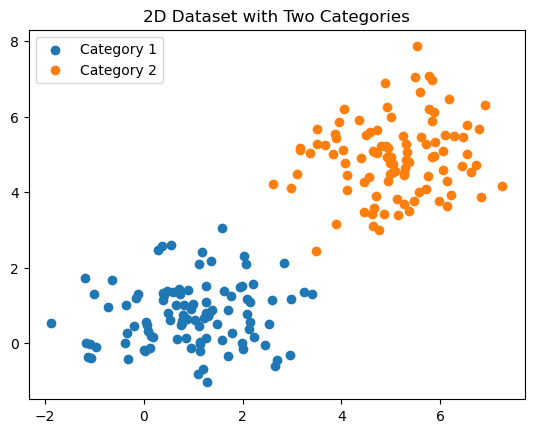

In [246]:
plt.scatter(category1[:,0],category1[:,1],label="Category 1")
plt.scatter(category2[:,0],category2[:,1],label="Category 2")
plt.legend()
plt.title('2D Dataset with Two Categories')

#### Merging the two data list

In [247]:
dataList = np.concatenate((category1,category2),axis=0)


#### Generate random number of K and get their index numbers from final data list

In [253]:
def initializeCentroids():
    indexList = []
    randomNumber = random.randrange(1,5)
    for i in range(0,randomNumber):
        temp = random.randrange(1,200)
        if temp in indexList:
            i = i-1
            continue
        indexList.append(temp)
    return [randomNumber,indexList]

#### Plot the data along with centroids

[169, 176]


Text(0.5, 1.0, '2D Dataset with Two Categories')

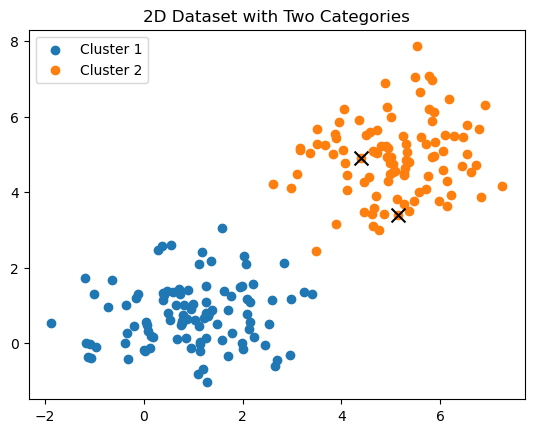

In [255]:
plt.scatter(category1[:,0],category1[:,1],label="Cluster 1")
plt.scatter(category2[:,0],category2[:,1],label="Cluster 2")
markerList = initializeCentroids()[1]
print(markerList)
for i in markerList:
    plt.scatter(dataList[i][0],dataList[i][1],marker='x',s=100,c='black')
plt.legend()
plt.title('2D Dataset with Two Categories')

#### Assign cluster will calculate the distance between all points and centroids and will assign the points closest to the centroid

In [256]:
def assignCluster(centroidList,dataList):
    assignPointDict = {}
    centroidLoc = centroidList
    for data in dataList:
        x1 = data[0];y1 = data[1]
        distanceDict = {}
        count = 0
        for centroid in centroidLoc:
            count = count+1
            x2 = centroid[0];y2 = centroid[1]
            distance = ((x2-x1)**2 + (y2-y1)**2)**(1/2)
            distanceDict[count] = distance
        temp = min(distanceDict.values())
        res = [key for key in distanceDict if distanceDict[key] == temp]
        if res[0] in assignPointDict:
            assignPointDict[res[0]].append([x1,y1])
        else:
            assignPointDict[res[0]] = []
            assignPointDict[res[0]].append([x1,y1])
    for key in list(assignPointDict.keys()):
        assignPointDict[key] = np.array(assignPointDict[key])
    return assignPointDict

In [257]:
centroidList = []
for i in markerList:
    centroidList.append(dataList[i])


In [258]:
centroidList

[array([5.14663588, 3.39435289]), array([4.39306712, 4.89785511])]

In [259]:
assignedPoints = assignCluster(centroidList,dataList)

#### Plot the data as clusters generated from assigned cluster function

In [260]:
def plotKdata(dataList,markerList,assignedPoints):
    count = 0
    for key in list(assignedPoints.keys()):
        count = count+1
        new = assignedPoints[key]
        plt.scatter(new[:,0],new[:,1],label="Category {}".format(count))

    for i in markerList:
        plt.scatter(i[0],i[1],marker='x',s=100,c='black')
    plt.legend()
    plt.title('2D Dataset with Two Categories')

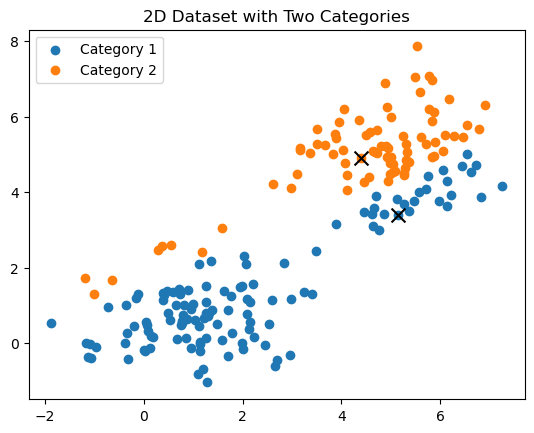

In [261]:
plotKdata(dataList,centroidList,assignedPoints)

#### Update centroids will calculate the mean of all points with their centroids and return new centroids

In [262]:
def update_centroids(assignedPoints):
    newCentroids = []
    for key in list(assignedPoints.keys()):
        nc = np.mean(assignedPoints[key], axis=0)
        newCentroids.append(nc)
    
    return newCentroids

In [263]:
newCentroids = update_centroids(assignedPoints)

In [264]:
assignedPoints = assignCluster(newCentroids,dataList)

#### Plot the data with new Centroids

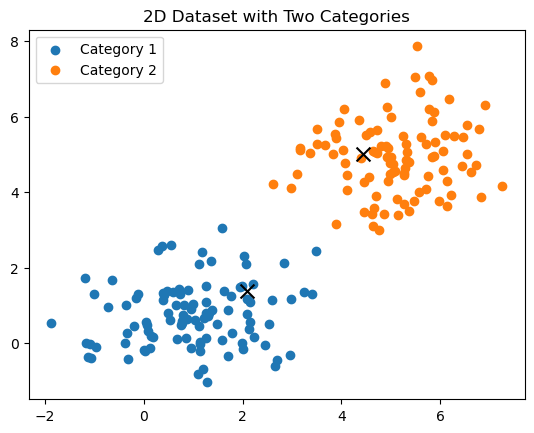

In [265]:
plotKdata(dataList,newCentroids,assignedPoints)

In [271]:
def KMeans(newCentroids,assignedPoints,dataList):
    oldCentroids = update_centroids(assignedPoints)
    assignedPoints = assignCluster(newCentroids,dataList)
    count = 0
    while(True):
        count = count+1
        newCentroids = update_centroids(assignedPoints)
        print(oldCentroids,newCentroids)
        y = all(np.array_equal(arr1, arr2) for arr1, arr2 in zip(oldCentroids, newCentroids)) #if old centroids and new centroids are true
        print(y)
        if(y):
            return [assignedPoints,newCentroids]
        else:
            oldCentroids = newCentroids
            assignedPoints = assignCluster(newCentroids,dataList)


In [272]:
output = KMeans(newCentroids,assignedPoints,dataList)

[array([0.99092734, 0.7649999 ]), array([5.09582083, 4.93715402])] [array([0.96602066, 0.74819436]), array([5.07967857, 4.91223802])]
False
[array([0.96602066, 0.74819436]), array([5.07967857, 4.91223802])] [array([0.96602066, 0.74819436]), array([5.07967857, 4.91223802])]
True


In [273]:
assignedPoints = output[0]
newCentroids = output[1]

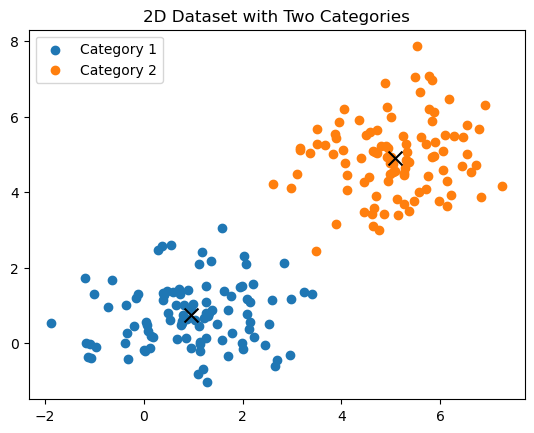

In [274]:
plotKdata(dataList,newCentroids,assignedPoints)

In [278]:
def read_idx(filename):
    with gzip.open(filename,'rb') as f:
        zero,data_type,dims = struct.unpack('>HBB',f.read(4))
        shape = tuple(struct.unpack('>I',f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(),dtype=np.uint8).reshape(shape)

In [313]:
x_test = read_idx("./MNIST/t10k-images-idx3-ubyte.gz")
y_test = read_idx("./MNIST/t10k-labels-idx1-ubyte.gz")
x_train = read_idx("./MNIST/train-images-idx3-ubyte.gz")
y_train = read_idx("./MNIST/train-labels-idx1-ubyte.gz")
print("Test Data - ",x_test.shape)
print("Test Label - ",y_test.shape)
print("Train Data - ",x_train.shape)
print("Train Label - ",y_train.shape)

Test Data -  (10000, 28, 28)
Test Label -  (10000,)
Train Data -  (60000, 28, 28)
Train Label -  (60000,)


In [314]:
# preprocessing the images

# convert each image to 1 dimensional array
X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [315]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data
kmeans.fit(X)

10


C:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=10)

In [316]:
kmeans.labels_

array([2, 8, 7, ..., 1, 0, 6])

In [311]:
indexList = []
k = 10
for i in range(0,k):
    temp = random.randrange(1,len(trainData))
    if temp in indexList:
        i = i-1
        continue
    indexList.append(temp)

In [312]:
indexList

[3899, 8363, 46517, 44039, 31374, 15850, 23111, 8723, 55747, 50547]

In [317]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

In [318]:
def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [320]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print (predicted_labels[:20])
print (Y[:20])

[8 0 4 1 7 6 1 8 1 7 8 1 3 6 1 7 6 7 1 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [321]:
from sklearn import metrics

def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [322]:
clusters = [10, 16, 64, 256]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    # print cluster metrics
    calculate_metrics(estimator, X, Y)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

C:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Number of Clusters: 10
Inertia: 2366153.0765416366
Homogeneity: 0.4773308452558706
Accuracy: 0.5796166666666667



C:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Number of Clusters: 16
Inertia: 2217744.4692631834
Homogeneity: 0.5435846588658466
Accuracy: 0.6154666666666667



C:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Number of Clusters: 36
Inertia: 1954209.4300802283
Homogeneity: 0.67343458142731
Accuracy: 0.7499833333333333



C:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Number of Clusters: 64
Inertia: 1800811.0628209412
Homogeneity: 0.7448919926100495
Accuracy: 0.8195



C:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Number of Clusters: 144
Inertia: 1624751.2591485532
Homogeneity: 0.8094877021514194
Accuracy: 0.8785333333333334



C:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Number of Clusters: 256
Inertia: 1503366.8494089446
Homogeneity: 0.8417602277575758
Accuracy: 0.8973



In [323]:
# test kmeans algorithm on testing dataset
# convert each image to 1 dimensional array
X_test = x_test.reshape(len(x_test),-1)

# normalize the data to 0 - 1
X_test = X_test.astype(float) / 255.

# initialize and fit KMeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

# predict labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    
# calculate and print accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

C:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Accuracy: 0.9049



C:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\Akshay\AppData\Local\Temp\ipykernel_49252\983761537.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


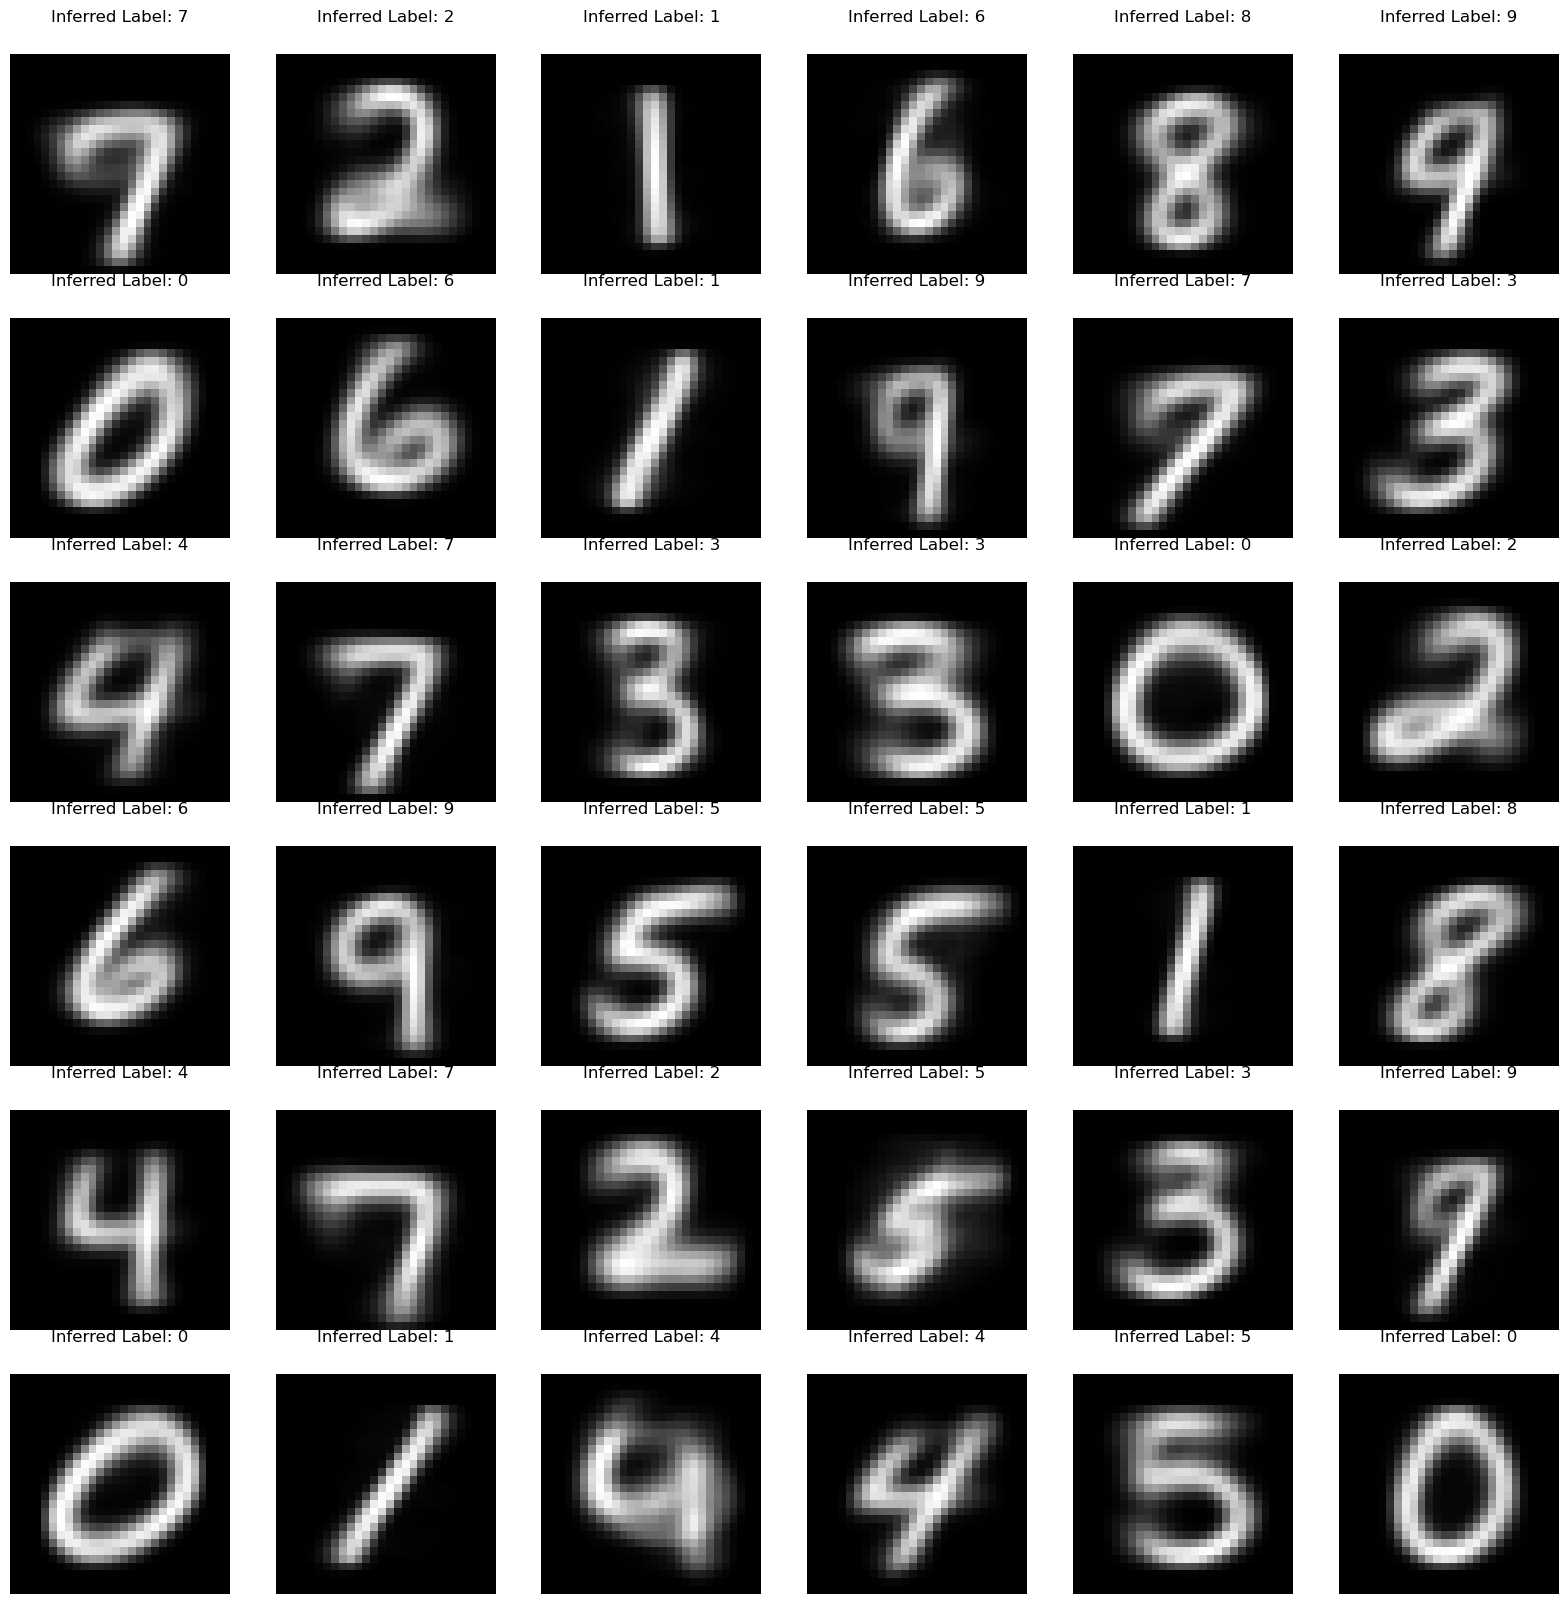

In [324]:
# Initialize and fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
fig.show()